In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [ ]:
from google.colab import drive

# mount your google drive
drive.mount('/content/drive')

# load dataset
df = pd.read_excel('/content/drive/MyDrive/Wholesale.xlsx',
                 names=["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen","Channel"])
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,7057,9810,9568,1762,3293,1776,1
1,6353,8808,7684,2405,3516,7844,1
2,13265,1196,4221,6404,507,1788,0
3,22615,5410,7198,3915,1777,5185,1
4,9413,8259,5126,666,1795,1451,1
...,...,...,...,...,...,...,...
434,29703,12051,16027,13135,182,2204,0
435,39228,1431,764,4510,93,2346,0
436,14531,15488,30243,437,14841,1867,1
437,10290,1981,2232,1038,168,2125,0


In [ ]:
data = df.iloc[:,0:6]
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788
3,22615,5410,7198,3915,1777,5185
4,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...
434,29703,12051,16027,13135,182,2204
435,39228,1431,764,4510,93,2346
436,14531,15488,30243,437,14841,1867
437,10290,1981,2232,1038,168,2125


In [ ]:
target = df.iloc[:,6:]
target

- First, to implement the KNN on the datasets, we’ll split our data into
75%/25% ratio with 75% of data used for training and 25% of data is used for
testing.
- For choosing the K value, we’ll choose the recommended K value that doesn't exceed N. Here, N stands for the number of training samples. It’s also
noted that K should be an odd number
to avoid ties in classification.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [ ]:
y_train = np.ravel(y_train)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
knn_Y_pred1 = knn1.predict(X_test)
knn_accuracy1=metrics.accuracy_score(y_test,knn_Y_pred1)
knn_accuracy_pc1=knn_accuracy1*100
print("Error on training dataset of k = ",3 , ": {:.2f}%".format(100-knn_accuracy_pc1) )

Error on training dataset of k =  3 : 7.27%


In [ ]:
knnq = KNeighborsClassifier(n_neighbors = 3)
knnq.fit(X_train, y_train)
knn_Y_predq = knnq.predict(X_test)
knn_accuracyq=metrics.accuracy_score(y_test,knn_Y_predq)*100

print("Accuracy on training dataset : {:.2f}%".format(knn_accuracyq) )

Accuracy on training dataset : 92.73%


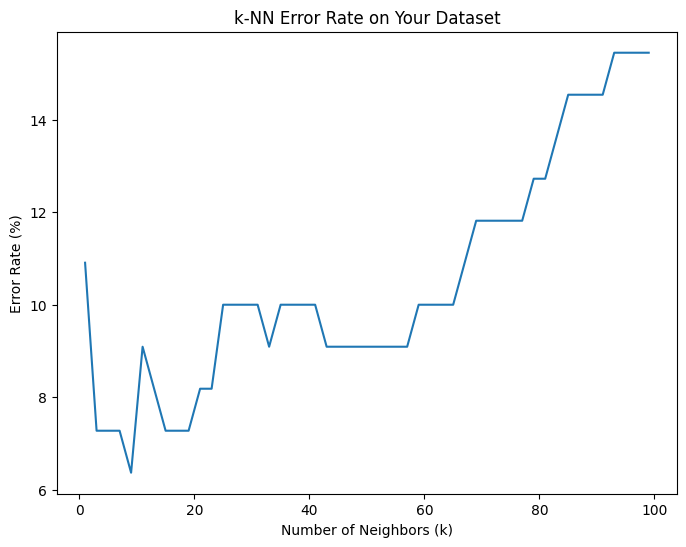

In [ ]:

import matplotlib.pyplot as plt

# Define k values
k_values = range(1, 100, 2)

# Store error rates for each k
error_rates = []

# Loop through k values
for k in k_values:
    # Create and train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict and calculate accuracy
    knn_Y_pred = knn.predict(X_test)
    knn_accuracy = metrics.accuracy_score(y_test, knn_Y_pred)
    error_rate = 100 - knn_accuracy * 100

    # Append error rate to list
    error_rates.append(error_rate)

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (%)')
plt.title('k-NN Error Rate on Your Dataset')


# Show the plot
plt.show()


After plotting the accuracy results of all the K values, we can see that the
error rate over time for larger numbers of K increases in general.

In [ ]:
normalized_x = normalize(data)

In [ ]:
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(normalized_x,target,test_size=0.25)

In [ ]:
n_y_train = np.ravel(n_y_train)

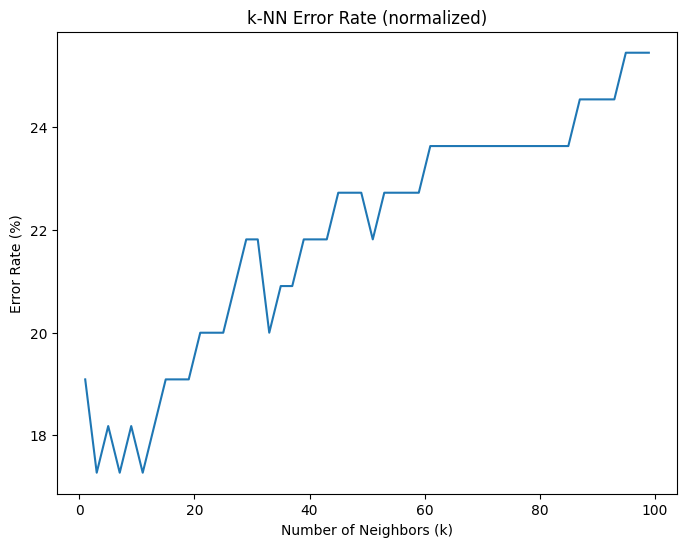

In [ ]:


import matplotlib.pyplot as plt

# Define k values
k_values = range(1, 100, 2)

# Store accuracy for each k
knn_accuracy_pcn_list = []

# Loop through k values
for k in k_values:
    # Create and train k-NN classifier
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(n_X_train, n_y_train)

    # Predict and calculate accuracy
    knn_Y_predn = knn3.predict(n_X_test)
    knn_accuracyn = metrics.accuracy_score(n_y_test, knn_Y_predn)
    knn_accuracy_pcn = knn_accuracyn * 100

    # Append accuracy to list
    knn_accuracy_pcn_list.append(100 - knn_accuracy_pcn)

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, knn_accuracy_pcn_list, linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (%)')
plt.title('k-NN Error Rate (normalized)')


# Show the plot
plt.show()

The performance of KNN after normalization on the dataset is a bit worse
than the datasets before normalization.

Normalizing the data may be a good idea to include information for variables
that have a large difference in variance as well but in this case, it’s probably
showed that the dataset scaled its feature in a same scale already thus
normalizing the datasets didn’t make it performs better

In [ ]:
for k in range (1,40, 2):
  knn3 = KNeighborsClassifier(n_neighbors = k)
  knn3.fit(n_X_train, n_y_train)
  knn_Y_predn = knn3.predict(n_X_test)
  knn_accuracyn=metrics.accuracy_score(n_y_test,knn_Y_predn)
  knn_accuracy_pcn=knn_accuracyn*100
  print("Error on training dataset of k = ",k , ": {:.2f}%".format(100-knn_accuracy_pcn) )

Error on training dataset of k =  1 : 19.09%
Error on training dataset of k =  3 : 17.27%
Error on training dataset of k =  5 : 18.18%
Error on training dataset of k =  7 : 17.27%
Error on training dataset of k =  9 : 18.18%
Error on training dataset of k =  11 : 17.27%
Error on training dataset of k =  13 : 18.18%
Error on training dataset of k =  15 : 19.09%
Error on training dataset of k =  17 : 19.09%
Error on training dataset of k =  19 : 19.09%
Error on training dataset of k =  21 : 20.00%
Error on training dataset of k =  23 : 20.00%
Error on training dataset of k =  25 : 20.00%
Error on training dataset of k =  27 : 20.91%
Error on training dataset of k =  29 : 21.82%
Error on training dataset of k =  31 : 21.82%
Error on training dataset of k =  33 : 20.00%
Error on training dataset of k =  35 : 20.91%
Error on training dataset of k =  37 : 20.91%
Error on training dataset of k =  39 : 21.82%


In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardlizing features
datascaled = StandardScaler().fit_transform(data)

In [ ]:
#PCA 2D projection
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(datascaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Channel']]], axis = 1)


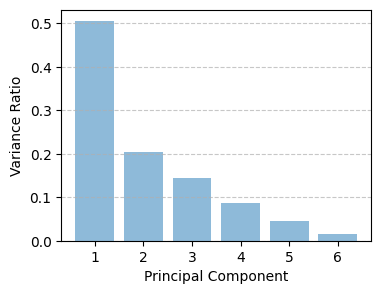

In [ ]:


# Standardize features
X_std = (normalized_x - np.mean(normalized_x, axis=0)) / np.std(normalized_x, axis=0)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate variance ratio
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(4, 3))
plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, align='center', alpha=0.5)

plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(np.arange(1, len(variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

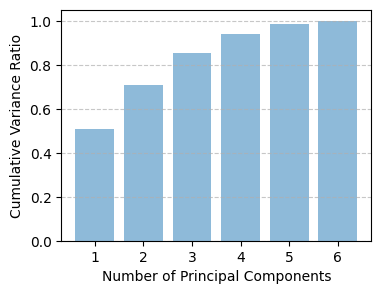

In [ ]:
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Plot principal components vs cumulative variance ratio as a bar graph
plt.figure(figsize=(4, 3))
plt.bar(range(1, len(variance_ratio) + 1), cumulative_variance_ratio, align='center', alpha=0.5)

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.xticks(np.arange(1, len(variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

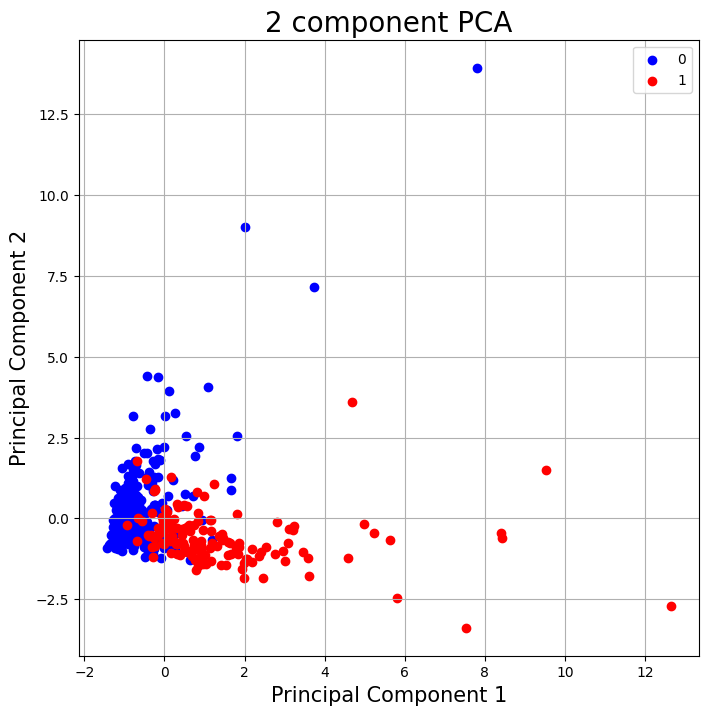

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

aims = [0,1]
colors = ['b', 'r']
for aim, color in zip(aims,colors):
    indicesToKeep = finalDf['Channel'] == aim
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(aims)
ax.grid()

In [ ]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(finalDf,target,test_size=0.25)
pca_y_train = np.ravel(pca_y_train)


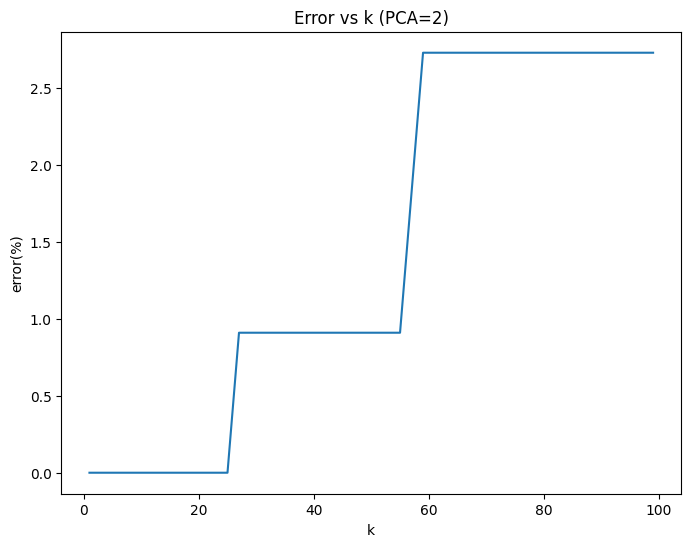

In [ ]:
k_values = range(1, 100, 2)
error = []
for j in k_values:
  knn4 = KNeighborsClassifier(n_neighbors = j)
  knn4.fit(pca_X_train, pca_y_train)
  knn_Y_predp = knn4.predict(pca_X_test)
  knn_accuracyp=metrics.accuracy_score(pca_y_test,knn_Y_predp)
  knn_error_pcp=100 - knn_accuracyp*100
  error.append(knn_error_pcp)


plt.figure(figsize=(8, 6))
plt.plot(k_values, error, linestyle='-')
plt.title('Error vs k (PCA=2)')
plt.xlabel('k')
plt.ylabel('error(%)')

plt.show()





In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = []
for l in range(1,100, 2):
    knn6 = KNeighborsClassifier(n_neighbors=l)
    scores = cross_val_score(knn6, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append((l, scores.mean()))
best_k = max(cv_scores, key=lambda x: x[1])[0]
print('Best k:', best_k)
knn5 = KNeighborsClassifier(n_neighbors=best_k)
knn5.fit(X_train, y_train)
print('Testing accuracy:', knn5.score(X_test, y_test))

Best k: 3
Testing accuracy: 0.9272727272727272


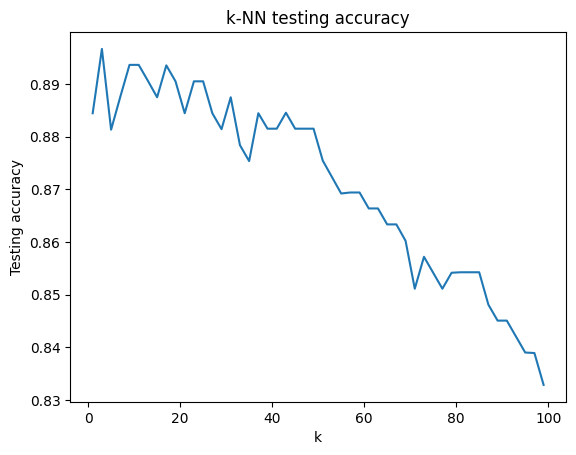

In [ ]:
ks, scores = zip(*cv_scores)
plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('Testing accuracy')
plt.title('k-NN testing accuracy')
plt.show()

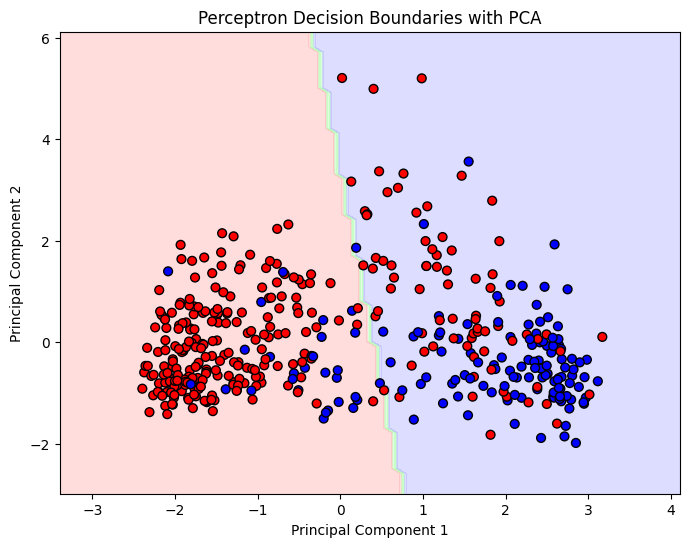

In [ ]:
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
y = df['Channel']
# Train the Perceptron classifier
perceptron = Perceptron()
perceptron.fit(X_pca, y)

# Define the colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=ListedColormap(['r', 'g', 'b']), edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Perceptron Decision Boundaries with PCA')

plt.show()

In [ ]:
# Calculate accuracy of the Perceptron model
y_pred = perceptron.predict(X_pca)
accuracy = accuracy_score(y, y_pred)
print("Accuracy of Perceptron model:", accuracy)

Accuracy of Perceptron model: 0.7562642369020501


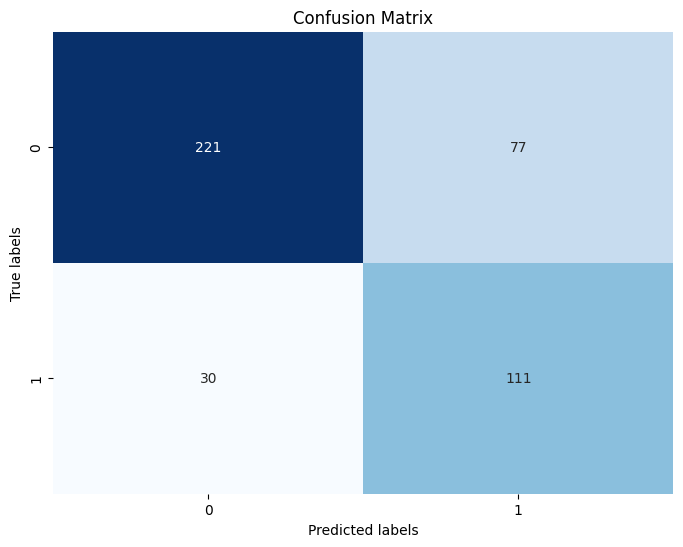

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
